In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
import plotly.graph_objects as go 
import plotly.figure_factory as ff 
from plotly.colors import n_colors 
from plotly.subplots import make_subplots  
import seaborn as sns


In [2]:
property_crime = pd.read_csv("D:/__studymaterial__/7-sem/Capston Project/Crimes_India/crime_data_2001-11/10_Property_stolen_and_recovered.csv")
rape_crime = pd.read_csv("D:/__studymaterial__/7-sem/Capston Project/Crimes_India/crime_data_2001-11/20_Victims_of_rape.csv")
auto_crime = pd.read_csv("D:/__studymaterial__/7-sem/Capston Project/Crimes_India/crime_data_2001-11/30_Auto_theft.csv")
murder_crime = pd.read_csv("D:/__studymaterial__/7-sem/Capston Project/Crimes_India/crime_data_2001-11/32_Murder_victim_age_sex.csv")
kidnapp_crime = pd.read_csv("D:/__studymaterial__/7-sem/Capston Project/Crimes_India/crime_data_2001-11/39_Specific_purpose_of_kidnapping_and_abduction.csv")

# D:/__studymaterial__/7-sem/Capston Project/Crimes_India/crime_data_2001-11

#### Cleaning Murder/Kidnapp dataset

In [3]:
# Cleaning Murder dataset
murder_crime.drop('Sub_Group_Name',axis=1,inplace=True)
murder_crime_total =  murder_crime[murder_crime['Group_Name'] == 'Murder - Total Victims']
murder_crime_total.reset_index(inplace=True)
murder_crime_total.drop('index',axis=1,inplace=True)

In [4]:
# Cleaning Kidnap dataset
kidnapp_crime.drop('Sub_Group_Name',axis=1,inplace=True)
kidnapp_crime = kidnapp_crime[kidnapp_crime['Group_Name'] == 'Kidnap - Total']

In [5]:
new_prop = property_crime[['Area_Name','Year','Cases_Property_Stolen']]
new_rape = rape_crime[['Area_Name', 'Year','Victims_of_Rape_Total']]
new_auto=auto_crime[['Area_Name','Year','Auto_Theft_Stolen']]
new_murder=murder_crime_total[['Area_Name','Year','Victims_Total']]
new_kidnap = kidnapp_crime[['Area_Name','Year','K_A_Grand_Total']]
new_kidnap.rename(columns={'K_A_Grand_Total':'Total_Kidnapp'},inplace=True)
new_kidnap['Total_Kidnapp']=new_kidnap['Total_Kidnapp'].astype(int)


In [6]:
new_prop=new_prop.groupby(['Area_Name','Year'])['Cases_Property_Stolen'].sum().reset_index()
new_rape=new_rape.groupby(['Area_Name','Year'])['Victims_of_Rape_Total'].sum().reset_index()
new_auto=new_auto.groupby(['Area_Name','Year'])['Auto_Theft_Stolen'].sum().reset_index()
new_murder=new_murder.groupby(['Area_Name','Year'])['Victims_Total'].sum().reset_index()
new_murder.rename(columns={'Victims_Total':'Total_Murders'},inplace=True)
new_kidnap=new_kidnap.groupby(['Area_Name','Year'])['Total_Kidnapp'].sum().reset_index()


# Concat_data_Statewise_Total(2001-11)

In [7]:
new_prop2=new_prop.groupby(['Area_Name'])['Cases_Property_Stolen'].sum()
new_rape2=new_rape.groupby(['Area_Name'])['Victims_of_Rape_Total'].sum()
new_auto2=new_auto.groupby(['Area_Name'])['Auto_Theft_Stolen'].sum()
new_murder2=new_murder.groupby(['Area_Name'])['Total_Murders'].sum()
new_kidnap2=new_kidnap.groupby(['Area_Name'])['Total_Kidnapp'].sum()

dfs = [new_prop2,new_rape2,new_auto2,new_murder2, new_kidnap2]
new_concat = pd.concat(dfs, axis=1,sort=False,join='inner')
new_concat.reset_index(inplace=True)

In [8]:
new_concat.head()

,Area_Name,Cases_Property_Stolen,Victims_of_Rape_Total,Auto_Theft_Stolen,Total_Murders,Total_Kidnapp
0,Andaman & Nicobar Islands,3662,168,166,137,76
1,Andhra Pradesh,642822,21392,113618,27481,17287
2,Arunachal Pradesh,16632,824,1658,703,682
3,Assam,245560,25524,22236,12761,20363
4,Bihar,411840,22526,45754,34675,28180


In [9]:
# # Saving as csv
# new_concat.to_csv(r'D:\__studymaterial__\7-sem\Capston Project\Crimes_India\Data_Visualizing_Exploring\Graph_visual_data.csv',index=False)

# Concat_data_Statewise_Yearly_2001-10

In [10]:
new_prop3=new_prop.groupby(['Area_Name','Year'])['Cases_Property_Stolen'].sum()
new_rape3=new_rape.groupby(['Area_Name','Year'])['Victims_of_Rape_Total'].sum()
new_auto3=new_auto.groupby(['Area_Name','Year'])['Auto_Theft_Stolen'].sum()
new_murder3=new_murder.groupby(['Area_Name','Year'])['Total_Murders'].sum()
new_kidnap3=new_kidnap.groupby(['Area_Name','Year'])['Total_Kidnapp'].sum()

dfs = [new_prop3,new_rape3,new_auto3,new_murder3]
new_concat_yearly = pd.concat(dfs, axis=1,sort=False,join='inner')
new_concat_yearly.reset_index(inplace=True)
new_concat_yearly.sort_values(['Area_Name','Year'],inplace=True)

In [11]:
new_concat_yearly.tail()

,Area_Name,Year,Cases_Property_Stolen,Victims_of_Rape_Total,Auto_Theft_Stolen,Total_Murders
307,West Bengal,2006,31442,3462,5428,1442
273,West Bengal,2007,34554,4212,4848,1653
238,West Bengal,2008,43618,4526,5134,1811
109,West Bengal,2009,43172,4672,7236,2161
73,West Bengal,2010,47518,4622,8610,2415


In [12]:
# new_merged = pd.merge(new_prop,new_auto,on=['Area_Name','Year'])
# new_merged.head(11)

# Saving file as csv

In [13]:
# new_merged.to_csv(r'D:\__studymaterial__\7-sem\Capston Project\Crimes_India\Data_Visualizing_Exploring\new_data.csv',index=False)

# Final_Dataset and Its Evaluation.

In [14]:
crime_state_wise = pd.read_csv('D:/__studymaterial__/7-sem/Capston Project/Crimes_India/Data_Visualizing_Exploring/data/crime_by_state_rt.csv')
crime_state_wise.head()

# D:\__studymaterial__\7-sem\Capston Project\Crimes_India\Data_Visualizing_Exploring\data

,STATE/UT,Year,Murder,Assault on women,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs
0,ANDHRA PRADESH,2001,45,69,22,3,2,6,518,950,312,1006
1,ANDHRA PRADESH,2002,60,98,18,0,4,12,568,830,459,1336
2,ANDHRA PRADESH,2003,33,79,27,1,15,4,615,1234,165,1386
3,ANDHRA PRADESH,2004,39,66,28,0,7,20,474,1319,68,1234
4,ANDHRA PRADESH,2005,37,74,21,0,0,9,459,1244,61,1212


In [15]:
states_group = crime_state_wise.groupby(['STATE/UT'])['Murder', 'Assault on women',
       'Kidnapping and Abduction', 'Dacoity', 'Robbery', 'Arson', 'Hurt',
       'Prevention of atrocities (POA) Act',
       'Protection of Civil Rights (PCR) Act', 'Other Crimes Against SCs'].sum().reset_index()

In [16]:
states_group.head(2)

,STATE/UT,Murder,Assault on women,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs
0,A & N ISLANDS,0,0,0,0,0,0,0,0,0,0
1,ANDHRA PRADESH,556,1110,238,9,39,136,7248,15160,1511,17412


In [17]:
population = pd.read_csv('D:/__studymaterial__/7-sem/Capston Project/Crimes_India/crime_data_2001-11/Population_state_2001&11.csv')


In [18]:
population.sort_values(by=['State'],ascending=True,inplace=True)
population.head()

,State,Population,Increase,Area(Km2),Density,Sex-Ratio,Literacy
31,Andaman and Nicobar Islands,"380,581",6.86%,"8,249",46,876,86.63
4,Andhra Pradesh,"84,580,777",10.98%,"275,045",308,993,67.02
26,Arunachal Pradesh,"1,383,727",26.03%,"83,743",17,938,65.38
13,Assam,"31,205,576",17.07%,"78,438",398,958,72.19
2,Bihar,"104,099,452",25.42%,"94,163","1,106",918,61.80


In [19]:
states_group['Population'] = population['Population']
states_group.head()

,STATE/UT,Murder,Assault on women,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs,Population
0,A & N ISLANDS,0,0,0,0,0,0,0,0,0,0,"199,812,341"
1,ANDHRA PRADESH,556,1110,238,9,39,136,7248,15160,1511,17412,"112,374,333"
2,ARUNACHAL PRADESH,1,0,0,0,1,0,0,0,0,0,"104,099,452"
3,ASSAM,57,57,96,14,33,25,341,3,1,318,"91,276,115"
4,BIHAR,286,284,127,29,77,309,4524,23425,466,3814,"84,580,777"


In [20]:
## Total Murders State_Wise
# plt.figure(figsize=(8,5))
# # sns.barplot(x='STATE/UT',y='Murder',data=states_group,hue='Murder')
# p = px.bar(states_group,x='STATE/UT',y='Murder')
# p.show()

# Year_Wise Crimes

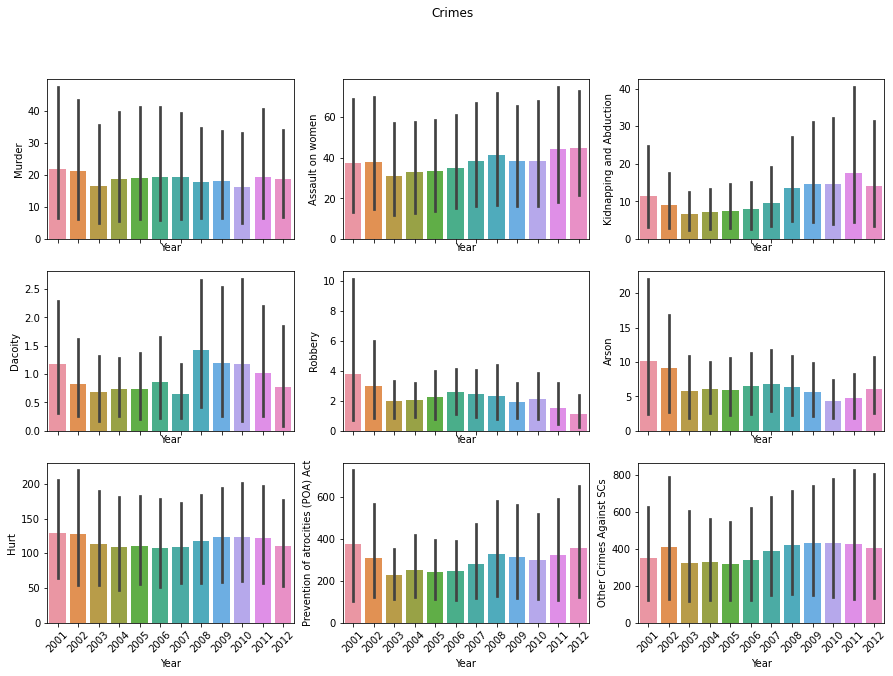

In [21]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10), sharex=True)
fig.suptitle('Crimes')

sns.barplot(ax=axes[0][0], x=crime_state_wise['Year'], y=crime_state_wise['Murder'])
sns.barplot(ax=axes[0][1], x=crime_state_wise['Year'], y=crime_state_wise['Assault on women'])
sns.barplot(ax=axes[0][2], x=crime_state_wise['Year'], y=crime_state_wise['Kidnapping and Abduction'])
sns.barplot(ax=axes[1][0], x=crime_state_wise['Year'], y=crime_state_wise['Dacoity'])
sns.barplot(ax=axes[1][1], x=crime_state_wise['Year'], y=crime_state_wise['Robbery'])
sns.barplot(ax=axes[1][2], x=crime_state_wise['Year'], y=crime_state_wise['Arson'])
sns.barplot(ax=axes[2][0], x=crime_state_wise['Year'], y=crime_state_wise['Hurt'])
sns.barplot(ax=axes[2][1], x=crime_state_wise['Year'], y=crime_state_wise['Prevention of atrocities (POA) Act'])
sns.barplot(ax=axes[2][2], x=crime_state_wise['Year'], y=crime_state_wise['Other Crimes Against SCs'])

# axes[0].set_title()
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)

# State_wise Crimes-(2001-2011)

> *** Murders in india ***

In [3]:
import pandas as pd
import plotly.express as px

df = pd.read_csv("D:/__studymaterial__/7-sem/Capston Project/Crimes_India/Data_Visualizing_Exploring/data/Graph_visual_data.csv")

fig = px.choropleth(
    df,
    geojson="https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson",
    featureidkey='properties.ST_NM',
    locations='Area_Name',
    color='Total_Murders',
    color_continuous_scale='Reds'
)
fig.update_geos(fitbounds="locations", visible=False)

fig.show()

In [22]:
import pandas as pd
import plotly.express as px

df = pd.read_csv("D:/__studymaterial__/7-sem/Capston Project/Crimes_India/Data_Visualizing_Exploring/Graph_visual_data.csv")
fig = px.choropleth(
    df,
    geojson="https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson",
    featureidkey='properties.ST_NM',
    locations='Area_Name',
    color='Total_Murders',
    color_continuous_scale='Reds',
    title='Total Murders',
    width=800,height=200

)

fig.update_geos(fitbounds="locations", visible=False)

fig.show()